In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
df = pd.read_csv('conjunto_de_datos_tmodulo_enut_2019.csv',encoding='latin-1')
df_nuevo = df[['EDAD_V','SEXO','NIV','P5_1','P5_3_1','P5_3_2','P5_3_3','P5_3_4','P5_6_6','P5_7','P5_7A']]
len(df_nuevo)

71404

In [3]:
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].replace({np.nan: '0'})
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({np.nan: '-1'})
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].replace({np.nan: '-1'})
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].astype(int)
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].astype(int)
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].astype(int)
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].astype(int)
df_nuevo['P5_7'] = df_nuevo['P5_7'].astype(float)
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].astype(int)
df_nuevo['tot_horas'] = df_nuevo['P5_3_1'] + df_nuevo['P5_3_3']
df_nuevo['tot_minutos'] = df_nuevo['P5_3_2'] + df_nuevo['P5_3_4']
df_nuevo['tot_horas'] = df_nuevo['tot_horas'] + (df_nuevo['tot_minutos']/60)
df_nuevo

C:\Users\PC EAGLE\AppData\Local\Temp\ipykernel_35628\1884883793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
C:\Users\PC EAGLE\AppData\Local\Temp\ipykernel_35628\1884883793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
C:\Users\PC EAGLE\AppData\Local\Temp\ipykernel_35628\1884883793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
0,88,2,2,2,0,0,0,0,NaN,-1.0,-1,0.0,0
1,64,2,2,2,0,0,0,0,NaN,-1.0,-1,0.0,0
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
4,22,2,8,1,22,0,18,0,1.0,99999.0,-1,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71399,54,2,2,2,0,0,0,0,NaN,-1.0,-1,0.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [4]:
df_nuevo = df_nuevo.loc[df_nuevo['P5_7'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['P5_7A'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['EDAD_V'] >= 15]
df_nuevo = df_nuevo.loc[df_nuevo['P5_1'] == 1]
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
5,48,2,7,1,40,0,5,0,2.0,6000.0,3,45.0,0
6,26,1,8,1,40,0,0,0,2.0,8000.0,3,40.0,0
9,50,1,2,1,55,0,0,0,2.0,900.0,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400.0,1,25.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [5]:
def agregaColFrecPago(df):
    res = []
    for x in df:
        if x == 1:
            res.append(48)
        else:
            if x == 2:
                res.append(21)
            else:
                if x == 3:
                    res.append(10)
                else:
                    res.append(1)
    
    return res
x = agregaColFrecPago(df_nuevo['P5_7A'])
df_nuevo['semanal'] = ((x * df_nuevo['P5_7'])/48)
df_nuevo['ganancia_hora'] = df_nuevo['semanal']/df_nuevo['tot_horas']
df_nuevo = df_nuevo.loc[df_nuevo['ganancia_hora'] <= 150]
df_nuevo = df_nuevo.loc[df_nuevo['tot_horas'] <= 70]

In [6]:
def grupos(df,minimo,maximo,num_grupos):
    minimo = minimo - 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    res = []
    for x in df:
        y = x - minimo
        y = int(y/tam_grupo)
        res.append(y)
    return res

def imprimeGrupo(minimo,maximo,num_grupos):
    minimo = minimo - 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    for i in range(num_grupos):
        st = 'grupo '
        x = minimo + i * tam_grupo
        y = minimo + (i + 1) * tam_grupo
        print('grupo ' + str(i) + ': (' + str(x) + ',' + str(y) +']')
        
def s2df(df):
    
    n = len(df)
    media = np.mean(df)
    s2 = df - media
    s2 = np.dot(s2,s2)
    s2 = s2 / (n-1)
    
    return s2

def intervaloDeConfVarDesc(df,alfa):
    
    res = []
    n = len(df)
    grados_de_libertad = n - 1
    media = np.mean(df)
    s2 = s2df(df)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    sn = s2 / n
    sn = pow(sn,1/2)
    res.append((media - sn * res_t))
    res.append((media + sn * res_t))
    
    return res

def intervaloDeConfDifMedias(x,alfa):
    
    res = []
    df_1 = x[0]
    df_2 = x[1]
    n1 = len(df_1)
    n2 = len(df_2)
    grados_de_libertad = n1 + n2 - 2
    media1 = np.mean(df_1)
    media2 = np.mean(df_2)
    dif = media1 - media2
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    s1 = pow(s21,1/2)
    s2 = pow(s22,1/2)
    s2p = (((n1-1) * s21) + ((n2-1) * s22))/grados_de_libertad
    sp = pow(s2p,1/2)
    rn = (1/n1) + (1/n2)
    rn = pow(rn,1/2)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    res.append((dif - res_t * sp * rn))
    res.append((dif + res_t * sp * rn))
    
    return res

def arrInterConfianza(metodo,arr,alfa):
    res = []
    for x in arr:
        
        res.append(metodo(x,alfa))
        
    return res

Separar la poblacion en niveles educativos (NIV) 
0 es sin educación
1-3 básica
4-6 media
7-8 superior

In [7]:
minimo = min(df_nuevo['tot_horas'])
maximo = max(df_nuevo['tot_horas'])
num_grupo = 16
df_nuevo['grupo_horas'] = grupos(df_nuevo['tot_horas'],minimo,maximo,num_grupo)
print('grupos de horas')
imprimeGrupo(minimo,maximo,num_grupo)
print('-------------------------------------------------------------------')
minimo = min(df_nuevo['ganancia_hora'])
maximo = max(df_nuevo['ganancia_hora'])
num_grupo = 16
df_nuevo['grupo_ganancia_hora'] = grupos(df_nuevo['ganancia_hora'],minimo,maximo,num_grupo)
print('grupos de ganacia por hora')
imprimeGrupo(minimo,maximo,num_grupo)
df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_nuevo.loc[df_nuevo['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

grupos de horas
grupo 0: (0.0,4.375]
grupo 1: (4.375,8.75]
grupo 2: (8.75,13.125]
grupo 3: (13.125,17.5]
grupo 4: (17.5,21.875]
grupo 5: (21.875,26.25]
grupo 6: (26.25,30.625]
grupo 7: (30.625,35.0]
grupo 8: (35.0,39.375]
grupo 9: (39.375,43.75]
grupo 10: (43.75,48.125]
grupo 11: (48.125,52.5]
grupo 12: (52.5,56.875]
grupo 13: (56.875,61.25]
grupo 14: (61.25,65.625]
grupo 15: (65.625,70.0]
-------------------------------------------------------------------
grupos de ganacia por hora
grupo 0: (-0.9479166666666666,8.486328125]
grupo 1: (8.486328125,17.920572916666664]
grupo 2: (17.920572916666664,27.354817708333332]
grupo 3: (27.354817708333332,36.7890625]
grupo 4: (36.7890625,46.223307291666664]
grupo 5: (46.223307291666664,55.657552083333336]
grupo 6: (55.657552083333336,65.09179687499999]
grupo 7: (65.09179687499999,74.52604166666666]
grupo 8: (74.52604166666666,83.96028645833333]
grupo 9: (83.96028645833333,93.39453124999999]
grupo 10: (93.39453124999999,102.82877604166666]
grupo 11:

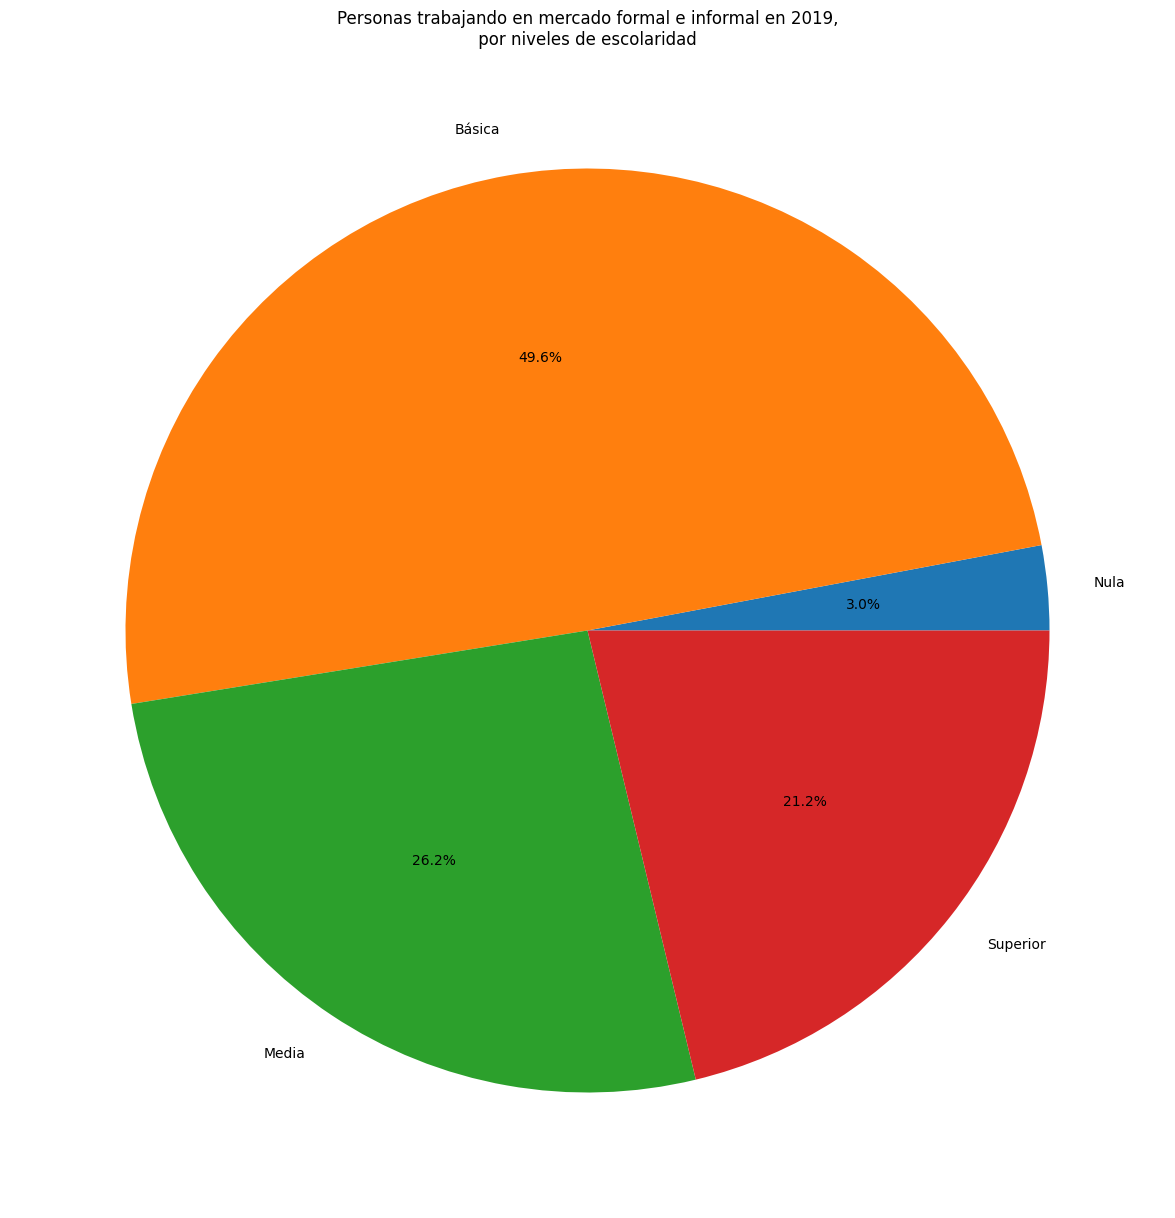

In [8]:
tot_muestra = len(df_nuevo)
tot_nula = len(df_nula)
tot_basica = len(df_basica)
tot_media = len(df_media)
tot_superior = len(df_superior)

arr_pie = [tot_nula/tot_muestra,tot_basica/tot_muestra,tot_media/tot_muestra,tot_superior/tot_muestra]
mylabels = ['Nula','Básica','Media','Superior']
plt.figure(figsize=(15,15))
plt.title("Personas trabajando en mercado formal e informal en 2019,\n por niveles de escolaridad ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 17 artists>

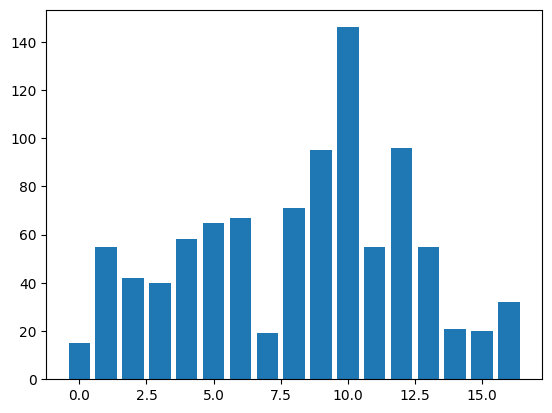

In [9]:
y = df_nula['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

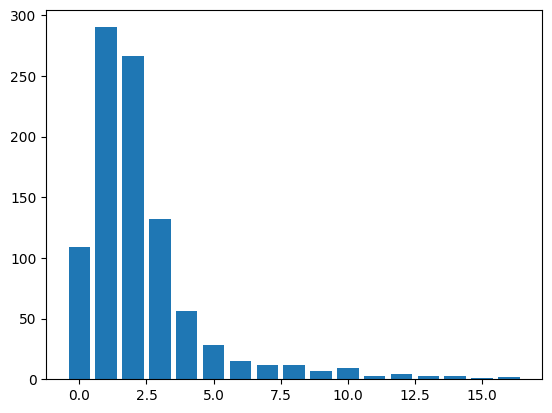

In [10]:
y = df_nula['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

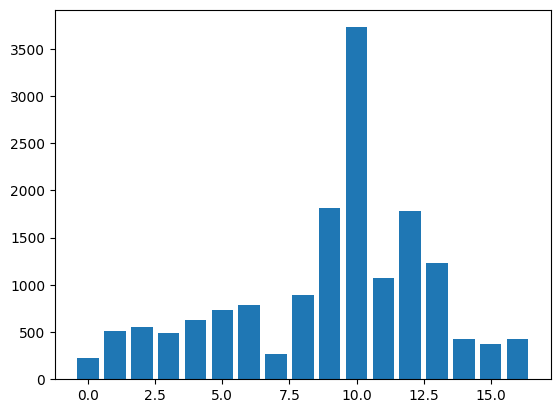

In [11]:
y = df_basica['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

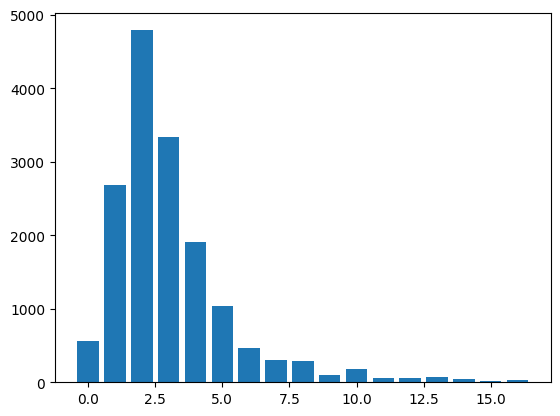

In [12]:
y = df_basica['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

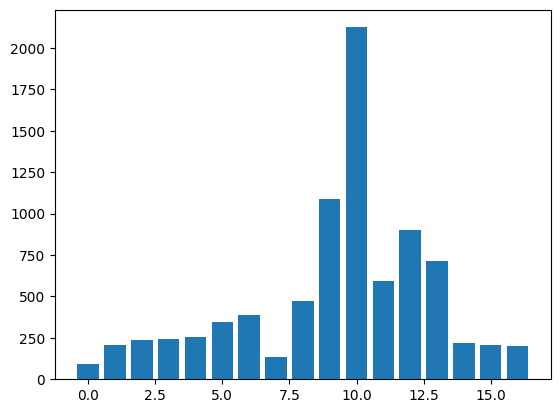

In [13]:
y = df_media['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

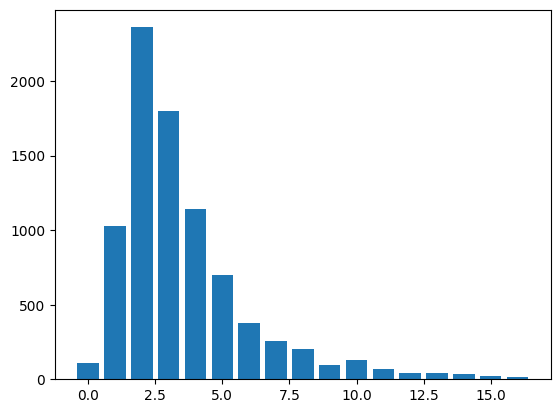

In [14]:
y = df_media['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

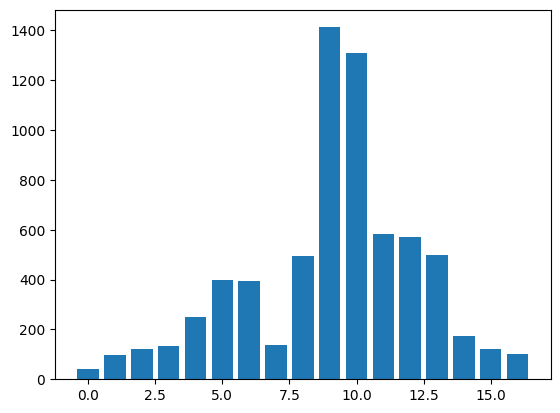

In [15]:
y = df_superior['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

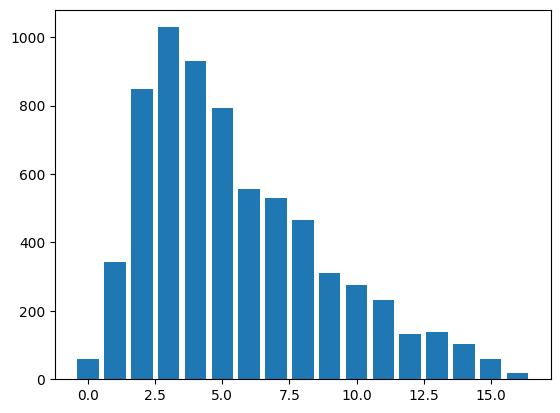

In [16]:
y = df_superior['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [17]:
alfa = .05
arr_horas = [df_nula['tot_horas'],df_basica['tot_horas'],df_media['tot_horas'],df_superior['tot_horas']]
arr_pago_hora = [df_nula['ganancia_hora'],df_basica['ganancia_hora'],df_media['ganancia_hora'],df_superior['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [18]:
arr_inter_horas

[[36.986341167075956, 39.25238432312012],
 [41.61294111809912, 42.118602618311634],
 [42.59652538653267, 43.25224333950391],
 [41.690752763107625, 42.34425992972578]]

In [19]:
arr_inter_pago_hora

[[24.45693084446124, 27.20534349369011],
 [32.358370175955955, 33.02691647515596],
 [36.847768851921224, 37.853934446750166],
 [55.23945005551579, 56.7258869752316]]

Licenciatura vs maestria y doctorado

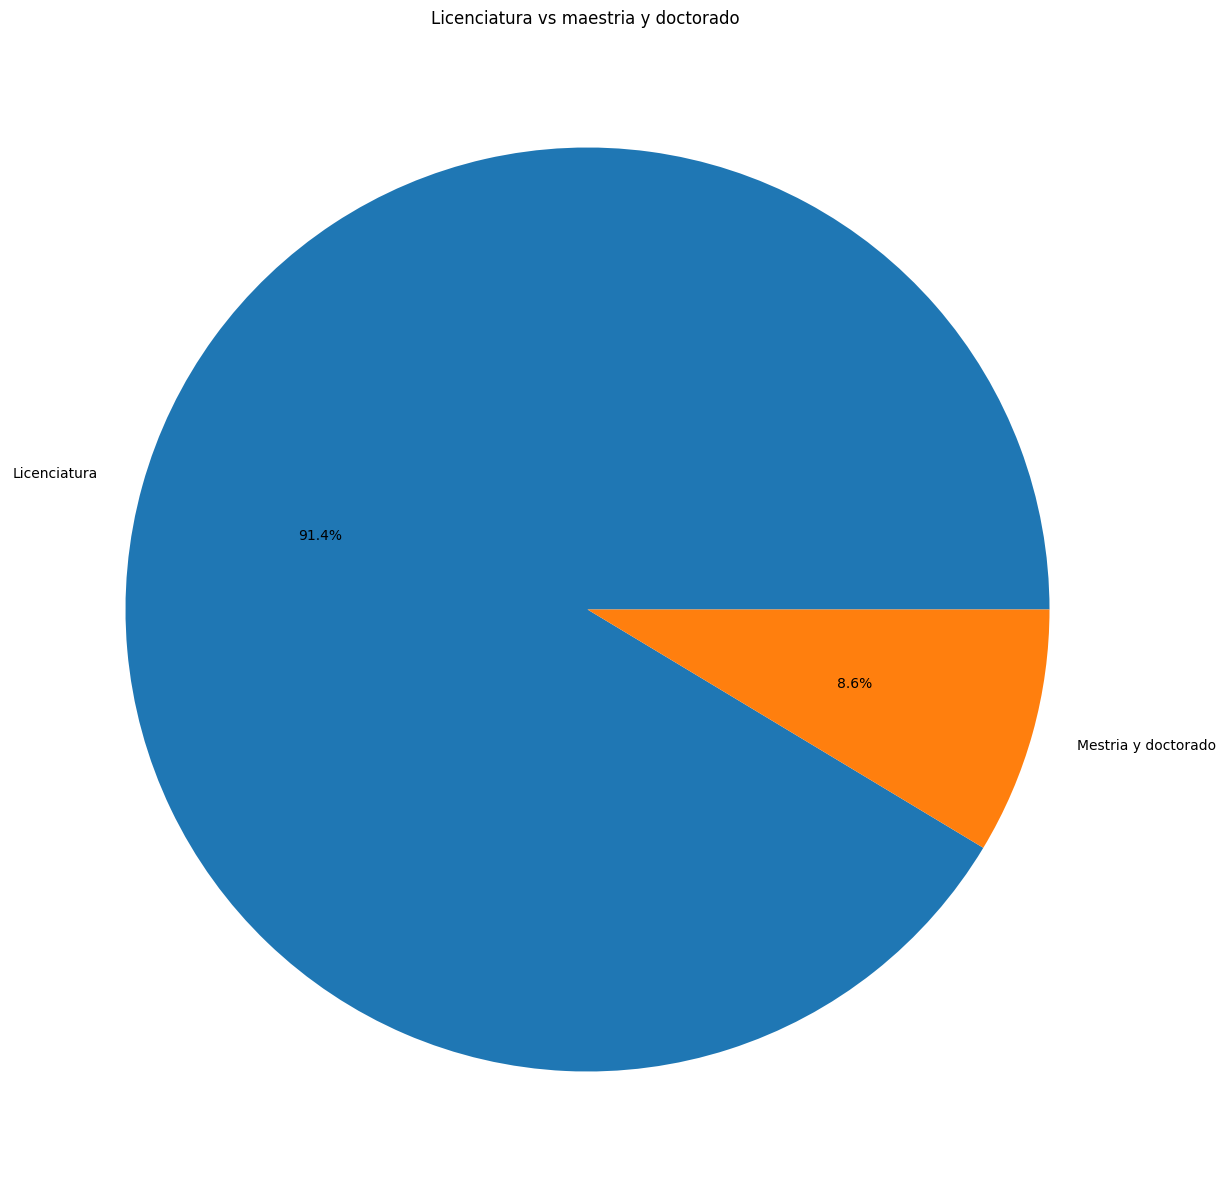

In [20]:
df_licenciatura = df_superior.loc[df_superior['NIV'] == 8]
df_mestria_doctorado = df_superior.loc[df_superior['NIV'] == 9]
tot_licenciatura = len(df_licenciatura)
tot_mestria_doctorado = len(df_mestria_doctorado)
arr_pie = [tot_licenciatura/tot_superior,tot_mestria_doctorado/tot_superior]
mylabels = ['Licenciatura','Mestria y doctorado']

plt.figure(figsize=(15,15))
plt.title("Licenciatura vs maestria y doctorado ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 17 artists>

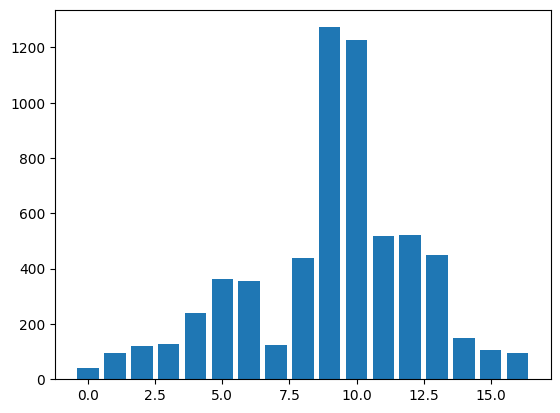

In [21]:
y = df_licenciatura['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

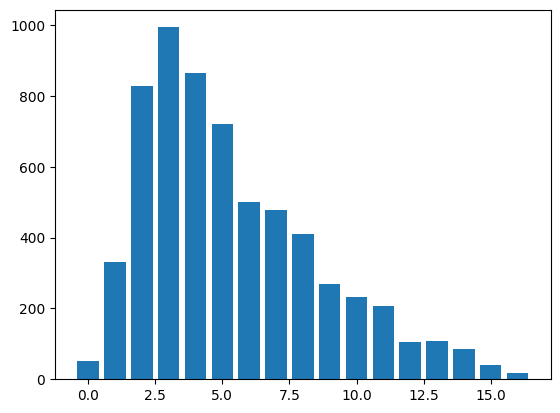

In [22]:
y = df_licenciatura['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

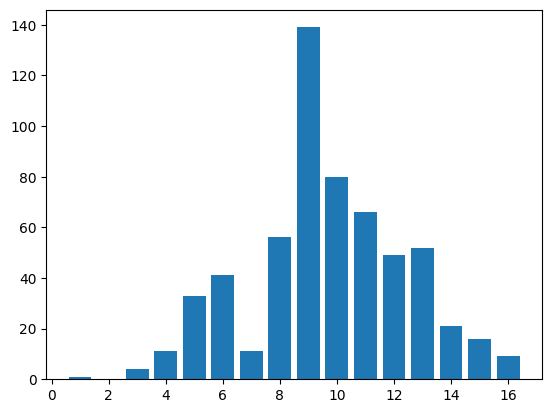

In [23]:
y = df_mestria_doctorado['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 16 artists>

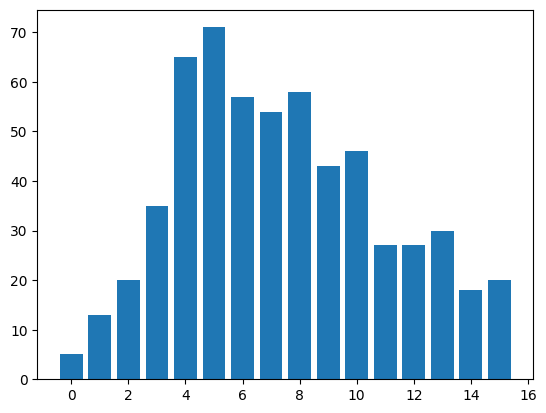

In [24]:
y = df_mestria_doctorado['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [25]:
alfa = .05
arr_horas = [df_licenciatura['tot_horas'],df_mestria_doctorado['tot_horas']]
arr_pago_hora = [df_licenciatura['ganancia_hora'],df_mestria_doctorado['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [26]:
arr_inter_horas

[[41.45584845224668, 42.14624055774424], [43.3375992241893, 45.28317044191143]]

In [27]:
arr_inter_pago_hora

[[53.56398642148707, 55.08207448211094],
 [70.83803095793789, 76.28683706989801]]

In [28]:
x = [df_licenciatura['ganancia_hora'],df_mestria_doctorado['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[-21.84719403113209, -16.6316130931058]

Hombres vs mujeres

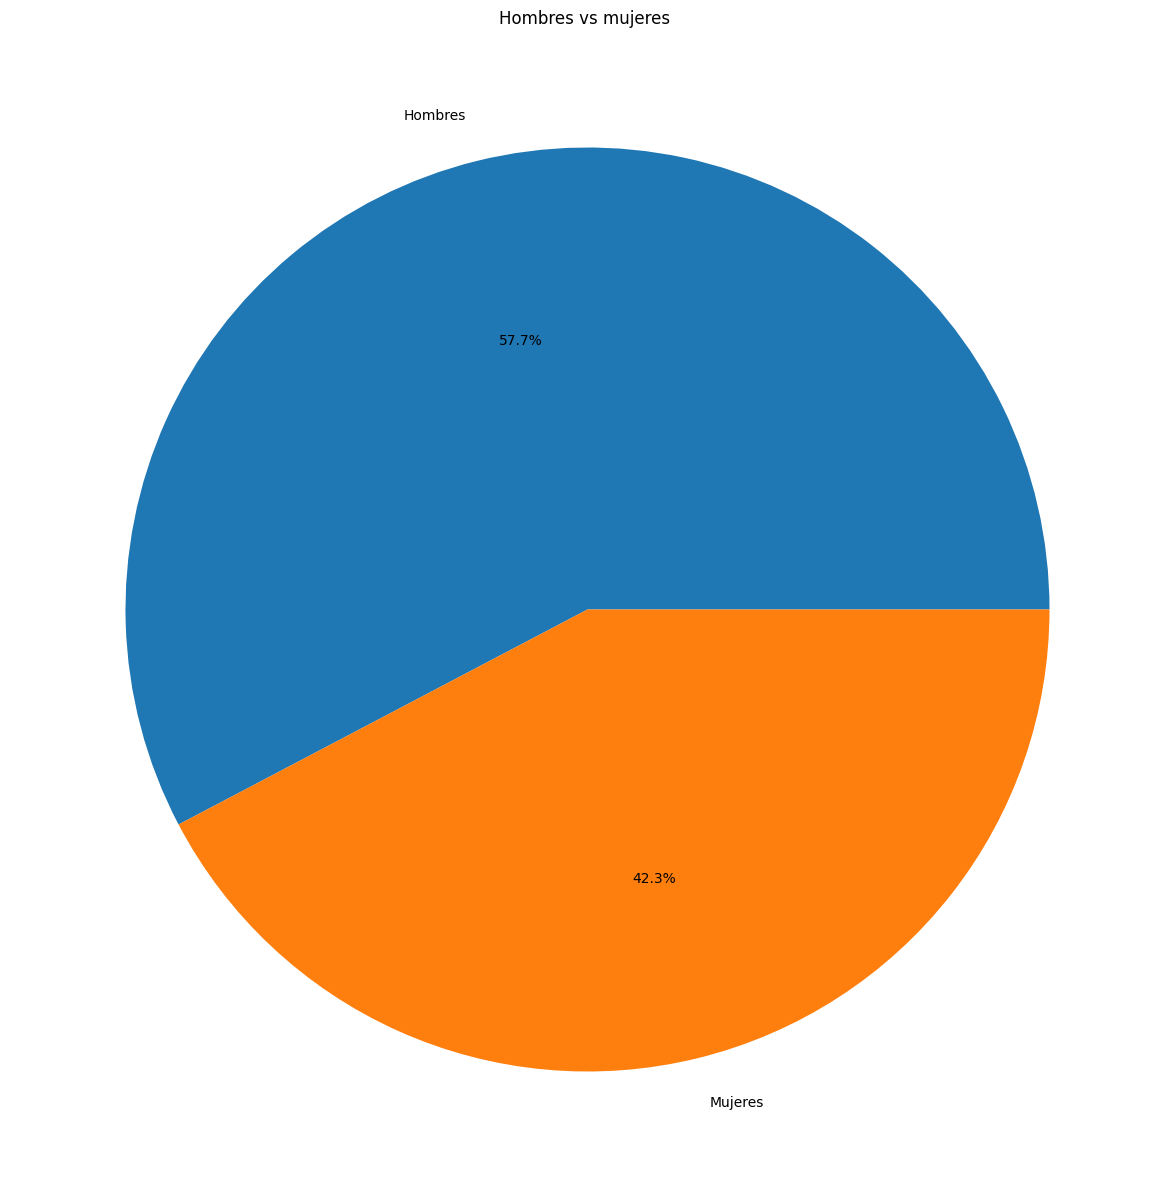

In [29]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]
tot_hombres = len(df_hombres)
tot_mujeres = len(df_mujeres)
arr_pie = [tot_hombres/tot_muestra,tot_mujeres/tot_muestra]
mylabels = ['Hombres','Mujeres']

plt.figure(figsize=(15,15))
plt.title("Hombres vs mujeres ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 17 artists>

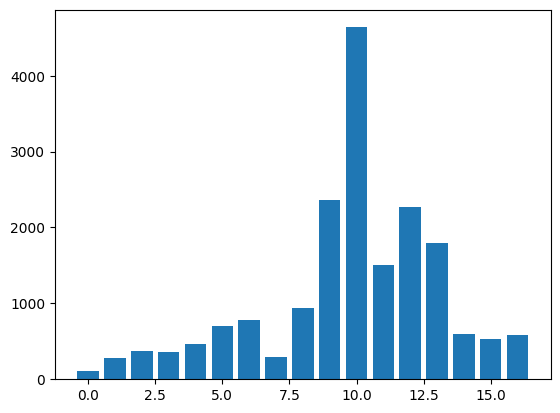

In [30]:
y = df_hombres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

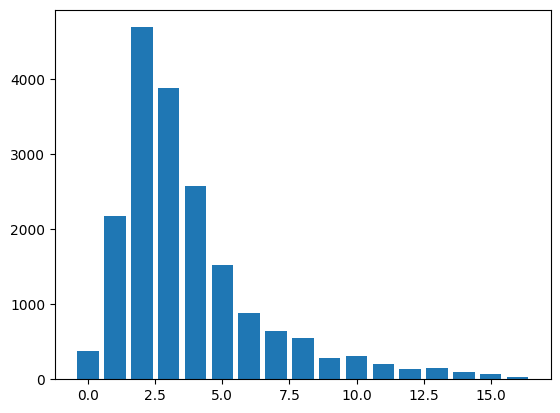

In [31]:
y = df_hombres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

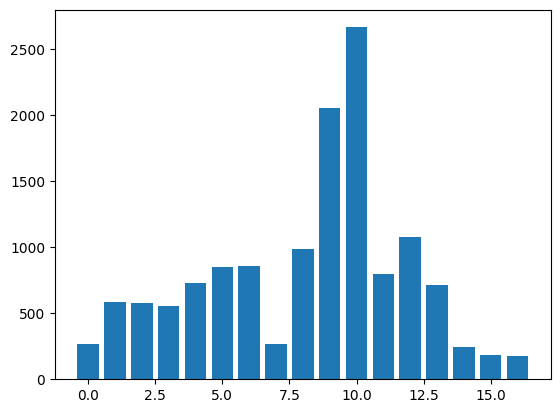

In [32]:
y = df_mujeres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

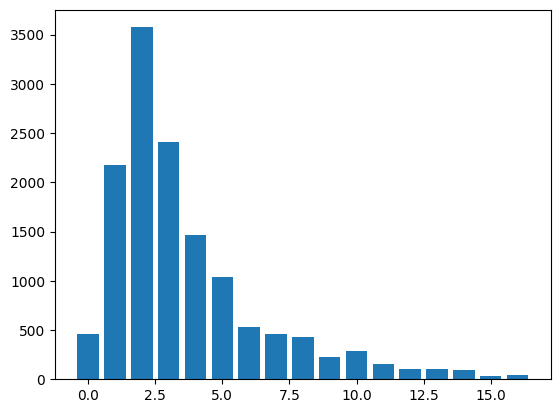

In [33]:
y = df_mujeres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [34]:
alfa = .05
arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [35]:
arr_inter_horas

[[44.98473763228669, 45.396720296864736],
 [37.52614257368737, 38.07347510148356]]

In [36]:
arr_inter_pago_hora

[[38.852684489082584, 39.58619659679679],
 [37.433721593614166, 38.34250098335107]]

In [37]:
x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)
dif_media_horas

[7.055097858432009, 7.726742395548482]

In [38]:
x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[0.752689397056883, 1.9099691118572513]

Formal vs informal

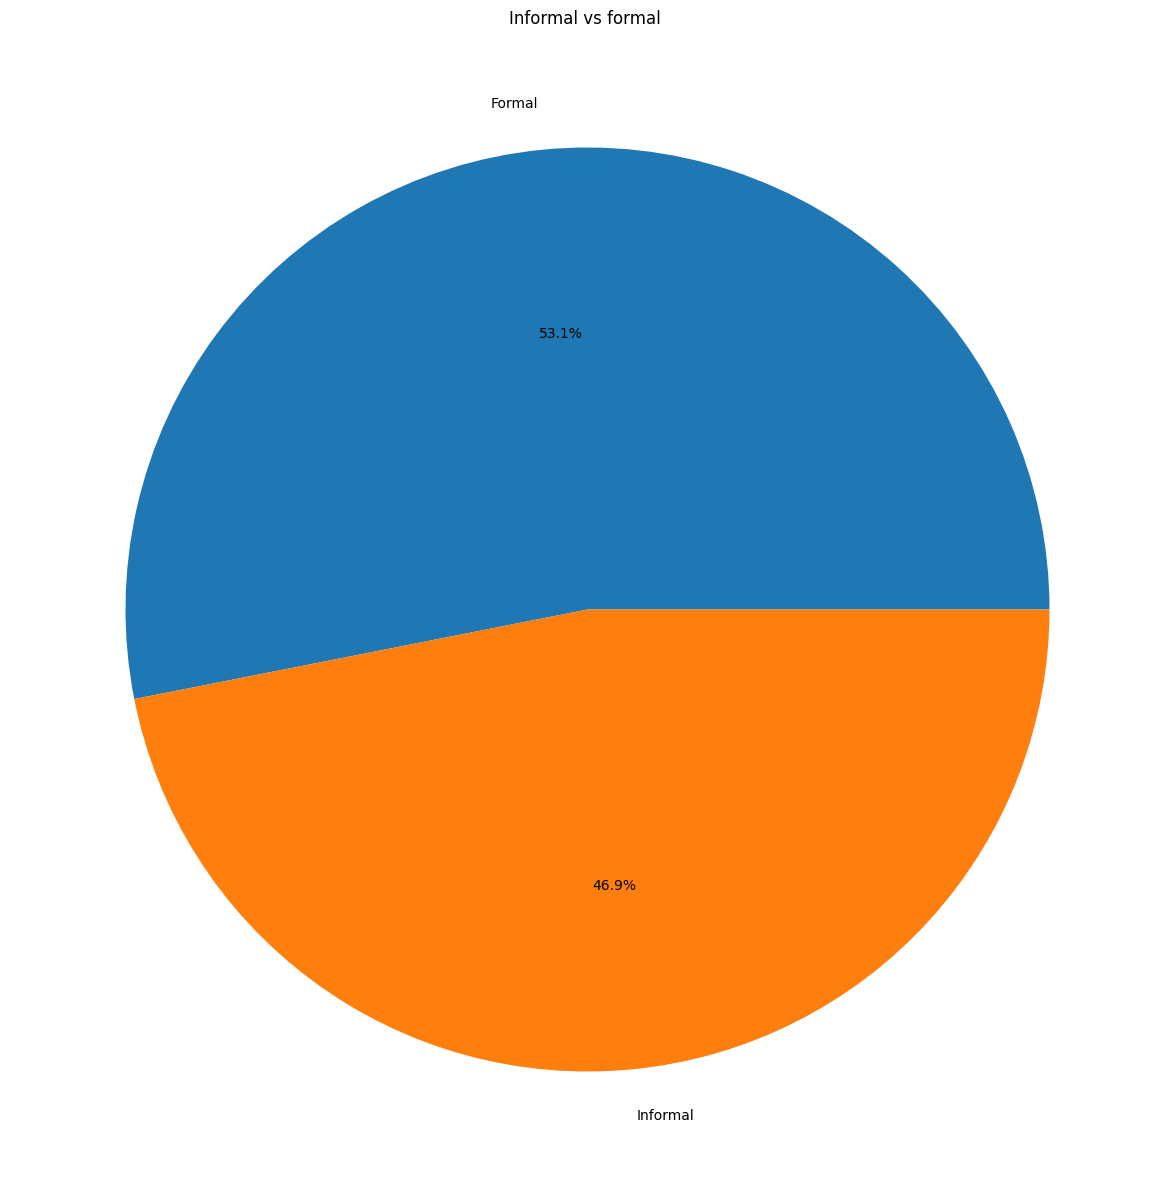

In [39]:
df_formal = df_nuevo.loc[df_nuevo['P5_6_6'] == 1.0]
df_informal = df_nuevo.loc[df_nuevo['P5_6_6'] == 2.0]

tot_formal = len(df_formal)
tot_informal = len(df_informal)
arr_pie = [tot_formal/tot_muestra,tot_informal/tot_muestra]
mylabels = ['Formal','Informal']

plt.figure(figsize=(15,15))
plt.title("Informal vs formal ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 17 artists>

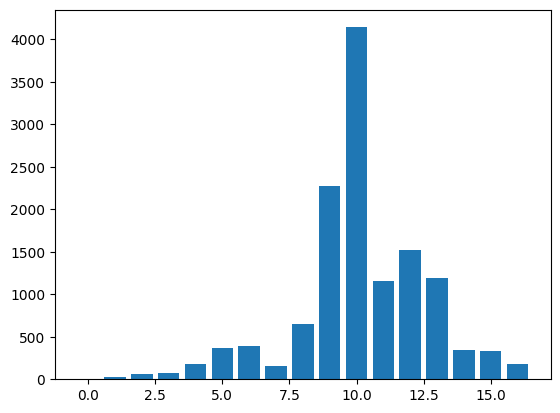

In [40]:
y = df_formal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

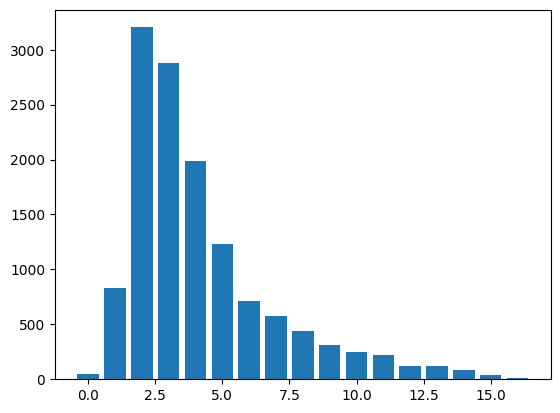

In [41]:
y = df_formal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

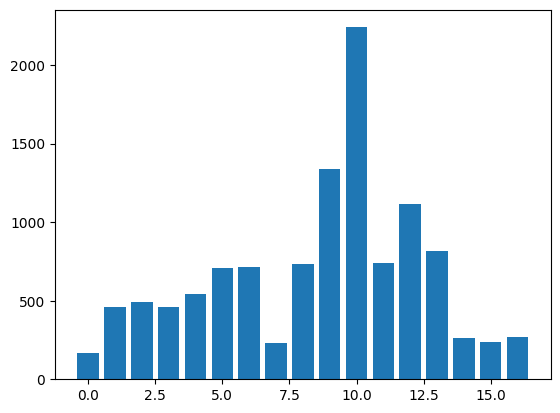

In [42]:
y = df_informal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 17 artists>

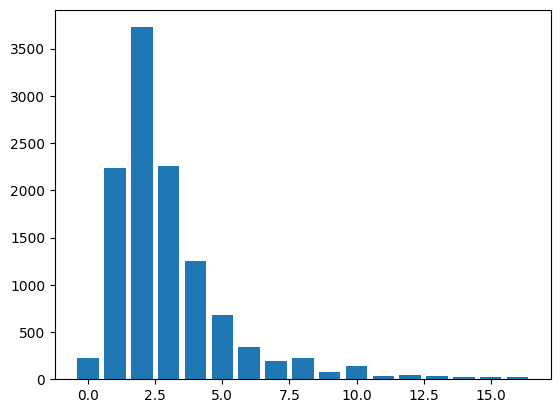

In [43]:
y = df_informal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [44]:
alfa = .05
arr_horas = [df_formal['tot_horas'],df_informal['tot_horas']]
arr_pago_hora = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [45]:
arr_inter_horas

[[46.55776582399523, 46.924581414172884],
 [39.27536080425349, 39.88913025350272]]

In [46]:
arr_inter_pago_hora

[[42.778900935680845, 43.66543227041503],
 [31.71492749126826, 32.48890219025986]]

In [47]:
x = [df_formal['tot_horas'],df_informal['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)
dif_media_horas

[6.810726274115333, 7.5071299062965755]

In [48]:
x = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[10.524669594334217, 11.71583393023354]

In [49]:
data = [23, 25, 18, 30, 21, 24, 20, 28, 22, 26]
x = [data]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,x,alfa)
arr_inter_horas

[[21.06512903745507, 26.33487096254493]]

In [50]:
data1 = [25, 30, 35, 40, 45]
data2 = [20, 28, 32, 38, 42]
x = [data1,data2]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[-9.048733685852401, 15.048733685852401]